In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()


In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
df = pd.DataFrame(cancer.data , columns = cancer.feature_names)

In [9]:
np.unique(cancer.target , return_counts = True)

(array([0, 1]), array([212, 357], dtype=int64))

In [12]:
for i , feature in enumerate(cancer.feature_names):
    print(f'feature {i+1} : {feature}')

feature 1 : mean radius
feature 2 : mean texture
feature 3 : mean perimeter
feature 4 : mean area
feature 5 : mean smoothness
feature 6 : mean compactness
feature 7 : mean concavity
feature 8 : mean concave points
feature 9 : mean symmetry
feature 10 : mean fractal dimension
feature 11 : radius error
feature 12 : texture error
feature 13 : perimeter error
feature 14 : area error
feature 15 : smoothness error
feature 16 : compactness error
feature 17 : concavity error
feature 18 : concave points error
feature 19 : symmetry error
feature 20 : fractal dimension error
feature 21 : worst radius
feature 22 : worst texture
feature 23 : worst perimeter
feature 24 : worst area
feature 25 : worst smoothness
feature 26 : worst compactness
feature 27 : worst concavity
feature 28 : worst concave points
feature 29 : worst symmetry
feature 30 : worst fractal dimension


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# 데이터 전처리

In [17]:
from sklearn.model_selection import train_test_split

train_input , test_input , train_target , test_target = train_test_split(cancer.data , cancer.target , test_size = 0.2 , random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled , train_target)

LogisticRegression()

In [25]:
lr.predict(test_scaled[:5])

array([1, 0, 0, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [24]:
accuracy_score(test_target , lr.predict(test_scaled))

0.9736842105263158

In [27]:
#예측확률
lr.predict_proba(test_scaled[:5])

array([[1.14327437e-01, 8.85672563e-01],
       [9.99990961e-01, 9.03924655e-06],
       [9.96901657e-01, 3.09834256e-03],
       [5.10962742e-04, 9.99489037e-01],
       [6.08832659e-05, 9.99939117e-01]])

In [28]:
lr.classes_

array([0, 1])

In [30]:
lr.coef_ , lr.intercept_

(array([[-0.42789615, -0.39391343, -0.38955025, -0.46431618, -0.06675416,
          0.54210625, -0.79677127, -1.1170207 ,  0.23571257,  0.07670117,
         -1.27114722,  0.18863977, -0.60936581, -0.90979979, -0.31246106,
          0.68597229,  0.18081531, -0.31769168,  0.49997976,  0.61340541,
         -0.87861043, -1.3421883 , -0.58755707, -0.84655924, -0.54994459,
          0.00520705, -0.94571375, -0.77343621, -1.20853126, -0.1541604 ]]),
 array([0.44359695]))

In [32]:
decisions = lr.decision_function(test_scaled[:5])
decisions

array([  2.04728073, -11.61392569,  -5.77378482,   7.57870279,
         9.70649132])

In [33]:
#예측

pred = lr.predict(test_scaled)

## 평가지표
 - 회귀 : MAE , MSE , RMSE
 - 분류 : accuracy(정확도) , precision(정밀도) , recall(재현율) , f1 score(f1스코어) , roc(roc곡선)
 - 군집화(Clustering) : DBI , 엘보우 메서드 , 실루엣계수

In [34]:
accuracy_score(test_target , pred)

0.9736842105263158

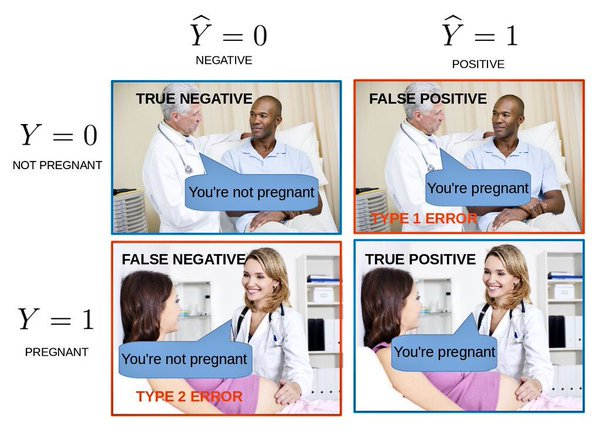

In [35]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg')

In [56]:
cm = confusion_matrix(test_target , pred)

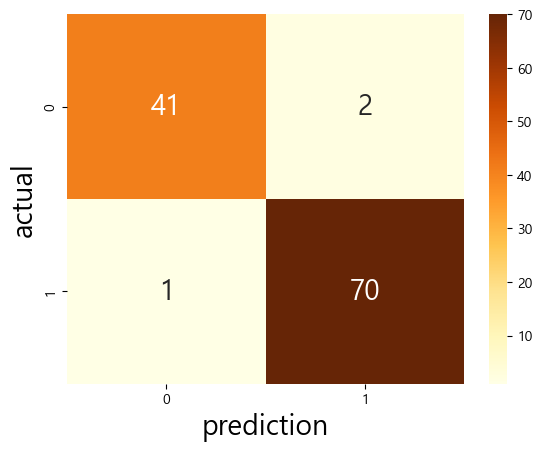

In [54]:
sns.heatmap(confusion_matrix(test_target , pred) , annot = True , annot_kws = {'size' : 20} , cmap = 'YlOrBr')
plt.xlabel('prediction' , fontsize = 20)
plt.ylabel('actual' , fontsize = 20)
plt.show()

In [45]:
precision_score(test_target , pred)

0.9722222222222222

In [57]:
TN , FP , FN , TP = cm.ravel()

In [60]:
precision = TP/(FP+TP)
precision

0.9722222222222222

In [63]:
accuracy = (TP+TN)/(TN+FP+FN+TP)
accuracy

0.9736842105263158

## 재현율 ( 민감도 )
 - TPR(True Positive Rate)

In [66]:
recall = TP/(FN+TP)
recall

0.9859154929577465

## F1 Score
 - 재현율과 정밀도의 조화평균

In [71]:
f1_score(test_target , pred)

0.979020979020979

# XGBoostClassifier

In [72]:
x_tr , x_val , y_tr , y_val = train_test_split(train_input , train_target , test_size = 0.1 , random_state = 42)

In [75]:
train_input.shape , x_val.shape , test_input.shape

((455, 30), (46, 30), (114, 30))

In [78]:
# 학습 , 검증 , 테스트용의 DMatrix 생성
import xgboost as xgb

dtr = xgb.DMatrix(data = x_tr , label = y_tr)
dval = xgb.DMatrix(data = x_val , label = y_val)
dtest = xgb.DMatrix(data = test_input , label = test_target)

In [99]:
params = {
    'max_depth' : 3,
    'eta' : 0.05,
    'objective' : 'binary:logistic',
    'eval_matric' : 'logloss'
}
num_rounds = 400

In [82]:
# 학습 데이터셋은 'train' , 평가 데이터셋은 'eval'
eval_list = [(dtr , 'train'),(dval , 'eval')]

xgb_model = xgb.train(params = params , dtrain = dtr , num_boost_round = num_rounds , early_stopping_rounds = 50 , evals = eval_list)

[14:48:19] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "eval_matrix" } are not used.

[0]	train-logloss:0.65115	eval-logloss:0.65383
[1]	train-logloss:0.61339	eval-logloss:0.61631
[2]	train-logloss:0.57816	eval-logloss:0.58279
[3]	train-logloss:0.54650	eval-logloss:0.55269
[4]	train-logloss:0.51708	eval-logloss:0.52435
[5]	train-logloss:0.48928	eval-logloss:0.49685
[6]	train-logloss:0.46442	eval-logloss:0.47361
[7]	train-logloss:0.44081	eval-logloss:0.44938
[8]	train-logloss:0.41861	eval-logloss:0.42710
[9]	train-logloss:0.39867	eval-logloss:0.40874
[10]	train-logloss:0.37961	eval-logloss:0.38933
[11]	train-logloss:0.36140	eval-logloss:0.37113
[12]	train-logloss:0.34439	eval-logloss:0.35445
[13]	train-logloss:0.32883	eval-logloss:0.33926
[14]	train-logloss:0.31457	eval-logloss:0.32639
[15]	train-logloss:0.30052	eval-logloss:0.31378
[16]	train-logloss:0.28728	eval-logloss:0.29995
[17]	train-logloss:0.27488	eval-logloss:0.28842
[

[167]	train-logloss:0.01413	eval-logloss:0.06424
[168]	train-logloss:0.01403	eval-logloss:0.06408
[169]	train-logloss:0.01390	eval-logloss:0.06386
[170]	train-logloss:0.01381	eval-logloss:0.06365
[171]	train-logloss:0.01368	eval-logloss:0.06345
[172]	train-logloss:0.01361	eval-logloss:0.06320
[173]	train-logloss:0.01353	eval-logloss:0.06272
[174]	train-logloss:0.01346	eval-logloss:0.06291
[175]	train-logloss:0.01336	eval-logloss:0.06248
[176]	train-logloss:0.01328	eval-logloss:0.06202
[177]	train-logloss:0.01318	eval-logloss:0.06148
[178]	train-logloss:0.01312	eval-logloss:0.06171
[179]	train-logloss:0.01305	eval-logloss:0.06131
[180]	train-logloss:0.01297	eval-logloss:0.06114
[181]	train-logloss:0.01285	eval-logloss:0.06094
[182]	train-logloss:0.01278	eval-logloss:0.06093
[183]	train-logloss:0.01271	eval-logloss:0.06048
[184]	train-logloss:0.01265	eval-logloss:0.06067
[185]	train-logloss:0.01258	eval-logloss:0.06038
[186]	train-logloss:0.01247	eval-logloss:0.06020
[187]	train-logloss:

[335]	train-logloss:0.00780	eval-logloss:0.04582
[336]	train-logloss:0.00779	eval-logloss:0.04576
[337]	train-logloss:0.00778	eval-logloss:0.04558
[338]	train-logloss:0.00777	eval-logloss:0.04539
[339]	train-logloss:0.00776	eval-logloss:0.04533
[340]	train-logloss:0.00775	eval-logloss:0.04549
[341]	train-logloss:0.00774	eval-logloss:0.04542
[342]	train-logloss:0.00773	eval-logloss:0.04549
[343]	train-logloss:0.00772	eval-logloss:0.04526
[344]	train-logloss:0.00771	eval-logloss:0.04520
[345]	train-logloss:0.00770	eval-logloss:0.04536
[346]	train-logloss:0.00769	eval-logloss:0.04529
[347]	train-logloss:0.00769	eval-logloss:0.04523
[348]	train-logloss:0.00768	eval-logloss:0.04538
[349]	train-logloss:0.00767	eval-logloss:0.04539
[350]	train-logloss:0.00766	eval-logloss:0.04533
[351]	train-logloss:0.00765	eval-logloss:0.04526
[352]	train-logloss:0.00764	eval-logloss:0.04541
[353]	train-logloss:0.00763	eval-logloss:0.04548
[354]	train-logloss:0.00762	eval-logloss:0.04526
[355]	train-logloss:

In [83]:
pred_probs = xgb_model.predict(dtest)
# 수행 결과값 10개만 표시하기
np.round(pred_probs[:10] , 3)

array([0.99 , 0.001, 0.001, 1.   , 1.   , 0.001, 0.001, 0.139, 0.202,
       0.999], dtype=float32)

In [86]:
pred_probs

array([9.9037081e-01, 6.7211420e-04, 5.4193771e-04, 9.9954849e-01,
       9.9979347e-01, 5.5076095e-04, 9.5640688e-04, 1.3855503e-01,
       2.0227407e-01, 9.9939466e-01, 9.7419906e-01, 4.2743105e-03,
       9.9855572e-01, 1.5629930e-02, 9.9816197e-01, 9.6055923e-04,
       9.9691749e-01, 9.9985695e-01, 9.9879336e-01, 1.1809827e-03,
       9.9376512e-01, 9.9799711e-01, 5.8213295e-04, 9.9595982e-01,
       9.9835545e-01, 9.9789631e-01, 9.9936658e-01, 9.9821317e-01,
       9.9938667e-01, 3.4198668e-04, 9.9948311e-01, 9.9865377e-01,
       9.5202249e-01, 9.9863535e-01, 9.9940932e-01, 9.9750692e-01,
       2.2289415e-01, 9.9703407e-01, 2.6445536e-04, 9.9806482e-01,
       9.9980766e-01, 1.3065446e-03, 9.9936861e-01, 9.9919337e-01,
       9.5063388e-01, 9.4756585e-01, 9.9928927e-01, 9.9214196e-01,
       9.3291867e-01, 9.9953938e-01, 1.9499917e-04, 5.2400189e-04,
       9.0604848e-01, 9.3682277e-01, 9.9971741e-01, 9.9757558e-01,
       9.9964511e-01, 5.6244584e-04, 9.4449215e-02, 9.9791878e

In [87]:
preds = [1 if x>0.5 else 0 for x in pred_probs]

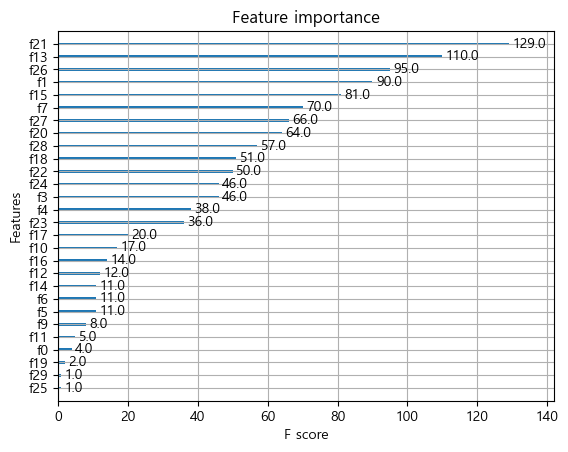

In [91]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

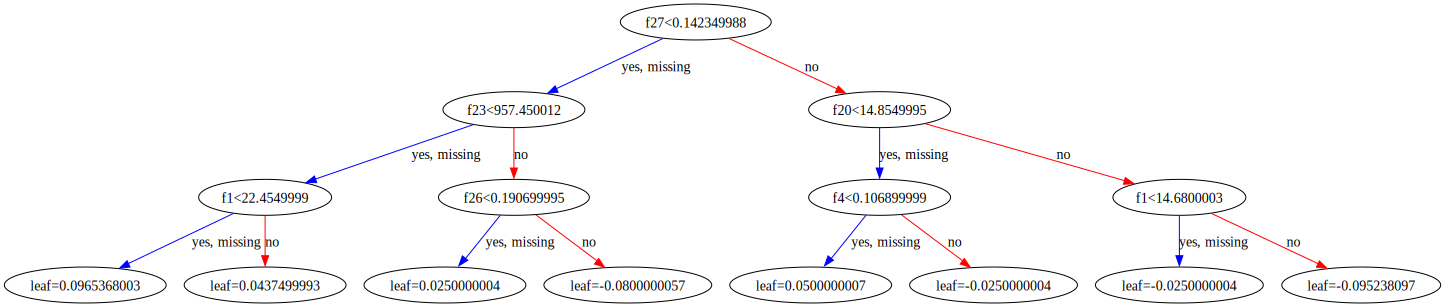

In [92]:
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)

In [103]:
params

{'max_depth': 3,
 'eta': 0.05,
 'objective': 'binary:logistic',
 'eval_matric': 'logloss'}

In [104]:
xgb.cv(params = params , dtrain = dtr , num_boost_round = 10 , nfold = 3)

[15:17:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "eval_matric" } are not used.

[15:17:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "eval_matric" } are not used.

[15:17:40] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "eval_matric" } are not used.



,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.651623,0.001028,0.655836,0.002434
1,0.613920,0.002312,0.621513,0.005306
2,0.579398,0.003022,0.590492,0.008264
3,0.547808,0.004078,0.562111,0.010548
4,0.518564,0.004716,0.536168,0.013169
5,0.491201,0.004776,0.512416,0.014985
6,0.466020,0.004780,0.490891,0.016849
7,0.442290,0.005092,0.470484,0.018146
8,0.420500,0.005745,0.451813,0.019897
9,0.399586,0.006278,0.433443,0.020465


In [109]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier(n_estimators = 400 , learning_rate = 0.1 , max_depth = 3 , random_state = 42)
xgb2.fit(train_input , train_target)

xgb2_pred = xgb2.predict(test_input)

accuracy_score(test_target , xgb2_pred)

0.9736842105263158

In [111]:
xgb2_pred_proba = xgb2.predict_proba(test_input)

In [115]:
xgb_w = XGBClassifier(n_estimators = 400 , learning_rate = 0.1 , max_depth = 3 , random_state = 42)
#조기종료를 위해 eval_set 담기
evals = [(test_input , test_target)]

xgb_w.fit(train_input , train_target , early_stopping_rounds = 100 , eval_metric = 'logloss' , eval_set = evals , verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [116]:
xgb_w.predict(test_input)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [117]:
xgb_w.score(test_input , test_target)

0.9736842105263158

- 민감하게 조정해야 하는 파라미터
 - booster 모양 : 회귀일때 씀.
 - eval_metric(평가할 함수) , objective(목적함수)
 - eta(학습률)
 - L1규제/L2규제

- 과적합 방지를 위해 조정해야 하는 것
 - learning rate 낮추기 : n_estimator은 높이기
 - max_depth 낮추기
 - min_child_weight(min_samples_leaf) 높이기
 - gamma 높이기
 - subsample , colsample_bytree 낮추기